# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

final_cities = list()
lat = list()
lng = list()
temp_max = list()
humidity = list()
cloudiness = list()
wind_speed = list()
country = list()
date = list()

print("Beginning Data Retrieval")
print("-----------------------------------")

counter = 0
set_counter = 1

for city in cities:
    response = requests.get(query_url + city).json()

    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        final_cities.append(city)
        counter += 1
        print(f"Processing Record {counter} of Set {set_counter} | {city}")

        if counter == 50:
            set_counter = set_counter+1
            counter = 0

    except KeyError:
        print("City not found. Skipping...")

print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | nouadhibou
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | synya
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | lima
Processing Record 10 of Set 1 | ratnagiri
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | atmakur
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | pavlohrad
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | fairbanks
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | grand-santi
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | abashiri
Ci

Processing Record 36 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 4 | rio gallegos
Processing Record 38 of Set 4 | san patricio
Processing Record 39 of Set 4 | krasnoselkup
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | vardo
City not found. Skipping...
Processing Record 42 of Set 4 | rassvet
Processing Record 43 of Set 4 | iranshahr
Processing Record 44 of Set 4 | san quintin
Processing Record 45 of Set 4 | ambatondrazaka
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | matara
Processing Record 49 of Set 4 | berlevag
Processing Record 50 of Set 4 | praia
Processing Record 1 of Set 5 | seddon
Processing Record 2 of Set 5 | kofele
Processing Record 3 of Set 5 | karratha
Processing Record 4 of Set 5 | torrington
Processing Record 5 of Set 5 | kalabo
Processing Record 6 of Set 5 | hanzhong
Processing Record 7 of Set 5 

Processing Record 19 of Set 8 | beihai
Processing Record 20 of Set 8 | arman
Processing Record 21 of Set 8 | banepa
Processing Record 22 of Set 8 | zyryanka
Processing Record 23 of Set 8 | kurumkan
Processing Record 24 of Set 8 | wanning
Processing Record 25 of Set 8 | kenai
Processing Record 26 of Set 8 | yarmouth
City not found. Skipping...
Processing Record 27 of Set 8 | iwaki
Processing Record 28 of Set 8 | port hawkesbury
Processing Record 29 of Set 8 | barentu
City not found. Skipping...
Processing Record 30 of Set 8 | tazovskiy
Processing Record 31 of Set 8 | dikson
City not found. Skipping...
Processing Record 32 of Set 8 | mainz
Processing Record 33 of Set 8 | korla
Processing Record 34 of Set 8 | xuddur
Processing Record 35 of Set 8 | atar
Processing Record 36 of Set 8 | mutoko
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | ouadda
Processing Record 39 of Set 8 | cururupu
Processing Record 40 of Set 8 | kulhudhuffushi
Processing Record 41 of Set 8 | hou

Processing Record 11 of Set 12 | aswan
Processing Record 12 of Set 12 | ladysmith
Processing Record 13 of Set 12 | nishihara
Processing Record 14 of Set 12 | avanigadda
Processing Record 15 of Set 12 | ust-shonosha
Processing Record 16 of Set 12 | cumberland
Processing Record 17 of Set 12 | chahal
Processing Record 18 of Set 12 | yeppoon
Processing Record 19 of Set 12 | tocopilla
Processing Record 20 of Set 12 | kuytun
Processing Record 21 of Set 12 | constitucion
Processing Record 22 of Set 12 | comodoro rivadavia
Processing Record 23 of Set 12 | vrangel
Processing Record 24 of Set 12 | grindavik
-----------------------------------
Data Retrieval Complete
-----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({
    "City": final_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temperature (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date
})
df.head()

,City,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,new norfolk,-42.78,147.06,50.0,90,100,1.99,AU,1593637335
1,nouadhibou,20.93,-17.03,68.0,88,40,24.16,MR,1593637336
2,kapaa,22.08,-159.32,84.2,62,20,12.75,US,1593637336
3,puerto ayora,-0.74,-90.35,78.8,65,20,21.92,EC,1593637337
4,hilo,19.73,-155.09,84.2,54,1,10.29,US,1593637337


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 574 non-null    object 
 1   Lat                  574 non-null    float64
 2   Lng                  574 non-null    float64
 3   Max Temperature (F)  574 non-null    float64
 4   Humidity (%)         574 non-null    int64  
 5   Cloudiness (%)       574 non-null    int64  
 6   Wind Speed (mph)     574 non-null    float64
 7   Country              574 non-null    object 
 8   Date                 574 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.5+ KB


In [6]:
df.to_csv(output_data_file, index=True, index_label="City_ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
df.describe()

,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,574.00000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.73385,20.096254,68.243571,71.074913,48.191638,7.816254,1.593637e+09
std,33.20472,88.753133,14.415531,19.405284,38.448146,5.528059,1.161812e+02
min,-54.80000,-179.170000,30.200000,10.000000,0.000000,0.090000,1.593637e+09
25%,-5.84250,-53.617500,57.200000,62.000000,6.000000,4.000000,1.593637e+09
50%,24.95000,27.550000,70.400000,75.000000,40.000000,6.860000,1.593637e+09
75%,48.80750,95.320000,79.120000,85.000000,90.000000,10.262500,1.593638e+09
max,78.22000,179.320000,101.030000,100.000000,100.000000,46.080000,1.593638e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y], facecolors="dodgerblue",
                edgecolors="black", alpha=0.4)
    plt.title(f"City Latitude vs {y} (02/07/20)")
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.grid()
    plt.savefig(f"output_data/{x}vs{y}.png")
    plt.show()

## Latitude vs. Temperature Plot

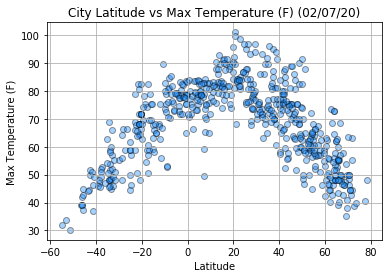

In [9]:
scatter_plot(df, "Lat", "Max Temperature (F)")

## Latitude vs. Humidity Plot

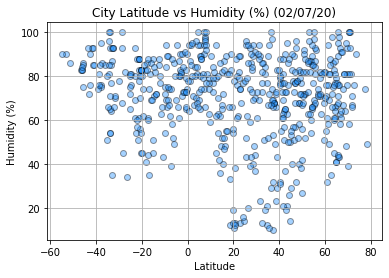

In [10]:
scatter_plot(df, "Lat", "Humidity (%)")

## Latitude vs. Cloudiness Plot

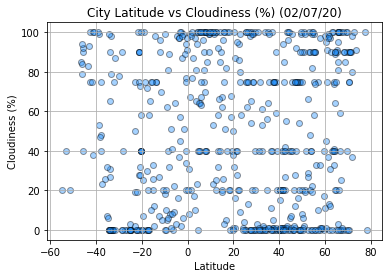

In [11]:
scatter_plot(df, "Lat", "Cloudiness (%)")

## Latitude vs. Wind Speed Plot

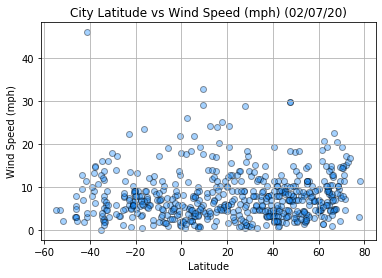

In [12]:
scatter_plot(df, "Lat", "Wind Speed (mph)")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(df_name, df, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    regress_values = slope * df[x] + intercept

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    print(f"The correlation coefficient is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(df[x], df[y], facecolors="grey", alpha=0.5)
    plt.plot(df[x], regress_values, "b--", linewidth=1)
    plt.annotate(line_eq, (df[x].min(), df[y].quantile(
        0.25)), fontsize=15, color="blue")
    plt.title(f"{df_name} Hemisphere - {y} vs Latitude")
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.savefig(f"output_data/Fig{df_name}_{x}vs{y}.png")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0]
southern_df = df[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.7219555361728551
The r-squared is: 0.5212197962106347


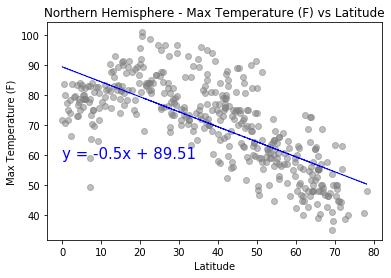

In [15]:
linear_regression_plot("Northern", northern_df,
                       x="Lat", y="Max Temperature (F)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.8433022175553341
The r-squared is: 0.711158630133744


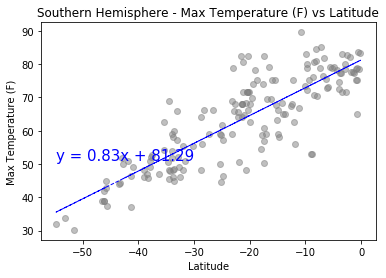

In [16]:
linear_regression_plot("Southern", southern_df,
                       x="Lat", y="Max Temperature (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.0032749974407406397
The r-squared is: 1.072560823685774e-05


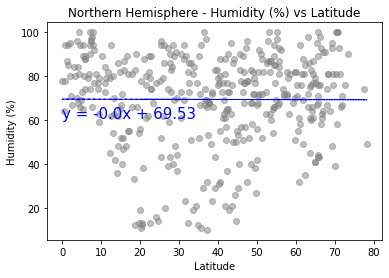

In [17]:
linear_regression_plot("Northern", northern_df, x="Lat", y="Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.1865568600766267
The r-squared is: 0.03480346204165007


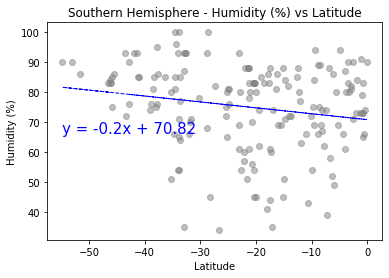

In [18]:
linear_regression_plot("Southern", southern_df, x="Lat", y="Humidity (%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.08000373096603004
The r-squared is: 0.006400596968484914


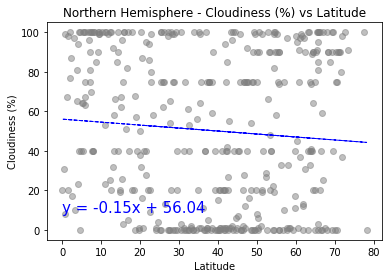

In [19]:
linear_regression_plot("Northern", northern_df, x="Lat", y="Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.017965313841390076
The r-squared is: 0.00032275250141964185


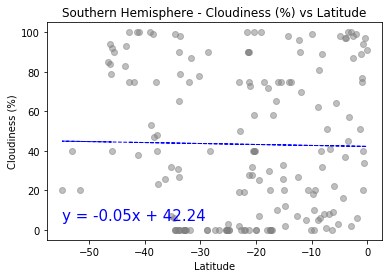

In [20]:
linear_regression_plot("Southern", southern_df, x="Lat", y="Cloudiness (%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.058874468246802834
The r-squared is: 0.003466203011343795


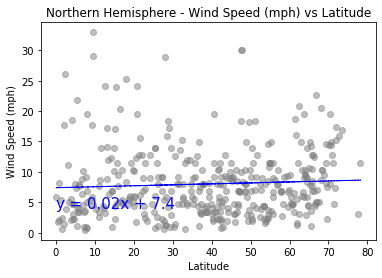

In [21]:
linear_regression_plot("Northern", northern_df, x="Lat", y="Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.050302757563801086
The r-squared is: 0.0025303674185225473


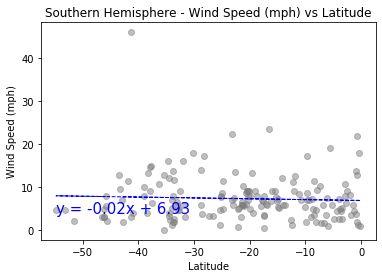

In [22]:
linear_regression_plot("Southern", southern_df, x="Lat", y="Wind Speed (mph)")